<a href="https://colab.research.google.com/github/votrung654/CS114.O21/blob/main/Moblie_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tiền xử lí dữ liệu

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import shap
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
df = pd.read_csv("/content/sample_data/train.csv")
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = df.drop('price_range', axis=1)
y = df['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
# Visualize dữ liệu (sử dụng pairplot)
import seaborn as sns
sns.pairplot(df, hue='price_range')
plt.show()
# ảnh có kích thước rất lớn


Huấn luyện mô hình:


In [ ]:
# Các thuật toán mô hình
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'MLP': MLPClassifier(),
    'AdaBoost': AdaBoostClassifier(n_estimators=50),
    'XGBoost': xgb.XGBClassifier(n_estimators=50)
}

# Huấn luyện và đánh giá từng mô hình trước khi chọn feature quan trọng
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\n{name} (Before Feature Selection):\n")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)


Logistic Regression (Before Feature Selection):

Accuracy: 0.965
Precision: 0.9652489648883879
Recall: 0.965
F1 Score: 0.9649100408988753

SVM (Before Feature Selection):

Accuracy: 0.885
Precision: 0.8890417969616541
Recall: 0.885
F1 Score: 0.885190087881681

Decision Tree (Before Feature Selection):

Accuracy: 0.855
Precision: 0.8570075624796978
Recall: 0.855
F1 Score: 0.8553852416481282


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



MLP (Before Feature Selection):

Accuracy: 0.915
Precision: 0.9153952351427183
Recall: 0.915
F1 Score: 0.9148167358996625

AdaBoost (Before Feature Selection):

Accuracy: 0.7866666666666666
Precision: 0.7895832525085831
Recall: 0.7866666666666666
F1 Score: 0.7845282136019366

XGBoost (Before Feature Selection):

Accuracy: 0.92
Precision: 0.9220010079983355
Recall: 0.92
F1 Score: 0.92045037372251


Boosting và Shap

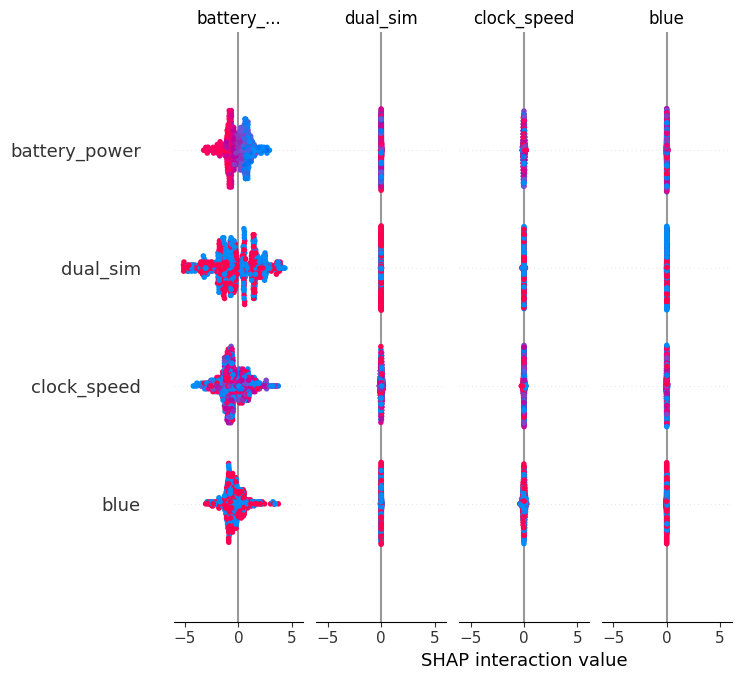

In [ ]:

# SHAP cho XGBoost
xgb_model = models['XGBoost']
explainer = shap.Explainer(xgb_model)
shap_values = explainer.shap_values(X_test_scaled)


# Visualize độ quan trọng của các feature
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)




Đánh giá mô hình

In [ ]:
# Chọn k feature quan trọng (ví dụ: chọn 5 feature quan trọng)
k = 5
top_k_features = X.columns[np.argsort(np.abs(shap_values).mean(axis=0))[::-1][:k]][0]

# Chỉ giữ lại các feature quan trọng
X_train_selected = X_train[top_k_features]
X_test_selected = X_test[top_k_features]

# Huấn luyện lại mỗi mô hình với các feature quan trọng
for name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\n{name} (After Feature Selection):\n")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

<ipython-input-14-ba6f52601053>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  top_k_features = X.columns[np.argsort(np.abs(shap_values).mean(axis=0))[::-1][:k]][0]



Logistic Regression (After Feature Selection):

Accuracy: 0.33166666666666667
Precision: 0.31098386987635757
Recall: 0.33166666666666667
F1 Score: 0.3004863922026365


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



SVM (After Feature Selection):

Accuracy: 0.3433333333333333
Precision: 0.1804875621890547
Recall: 0.3433333333333333
F1 Score: 0.23433915455539928

Decision Tree (After Feature Selection):

Accuracy: 0.2733333333333333
Precision: 0.27407948506592666
Recall: 0.2733333333333333
F1 Score: 0.27270852469477713


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



MLP (After Feature Selection):

Accuracy: 0.225
Precision: 0.20522360055133163
Recall: 0.225
F1 Score: 0.185623582966889

AdaBoost (After Feature Selection):

Accuracy: 0.295
Precision: 0.2860407140751968
Recall: 0.295
F1 Score: 0.27871247169428776

XGBoost (After Feature Selection):

Accuracy: 0.26666666666666666
Precision: 0.26612391726949075
Recall: 0.26666666666666666
F1 Score: 0.2642583143359567
